<a href="https://colab.research.google.com/github/Ranjankumar666/Mask_Detector_CNN/blob/main/Mask_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ahemateja19bec1025/facemask-dataset

 75% 38.0M/50.4M [00:01<00:00, 17.8MB/s]
100% 50.4M/50.4M [00:01<00:00, 34.7MB/s]


In [ ]:
! unzip /content/facemask-dataset.zip

Archive:  /content/facemask-dataset.zip
  inflating: dataset/dataset/0/0.jpg  
  inflating: dataset/dataset/0/1.jpg  
  inflating: dataset/dataset/0/10.jpg  
  inflating: dataset/dataset/0/100.jpg  
  inflating: dataset/dataset/0/101.jpg  
  inflating: dataset/dataset/0/102.jpg  
  inflating: dataset/dataset/0/104.jpg  
  inflating: dataset/dataset/0/105.jpg  
  inflating: dataset/dataset/0/106.jpg  
  inflating: dataset/dataset/0/107.jpg  
  inflating: dataset/dataset/0/108.jpg  
  inflating: dataset/dataset/0/109.jpg  
  inflating: dataset/dataset/0/11.jpg  
  inflating: dataset/dataset/0/110.jpg  
  inflating: dataset/dataset/0/111.jpg  
  inflating: dataset/dataset/0/112.jpg  
  inflating: dataset/dataset/0/114.jpg  
  inflating: dataset/dataset/0/115.jpg  
  inflating: dataset/dataset/0/116.jpg  
  inflating: dataset/dataset/0/117.jpg  
  inflating: dataset/dataset/0/118.jpg  
  inflating: dataset/dataset/0/119.jpg  
  inflating: dataset/dataset/0/12.jpg  
  inflating: dataset/dat

In [ ]:
! rm -rf ./images

In [ ]:
! rm -rf ./annotations

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import os
import random 
def choose_rand_img(path):
    dir_files = os.listdir(path)
    selection = random.choice(dir_files)
    img = plt.imread(f'{path}/{selection}')
    plt.imshow(img)
    print(f"shape: {img.shape}")

    return img

shape: (390, 345, 3)


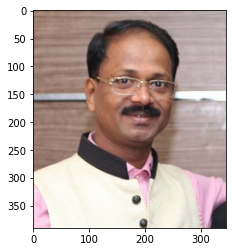

In [ ]:
img = choose_rand_img('/content/dataset/dataset/0')

shape: (640, 480, 3)


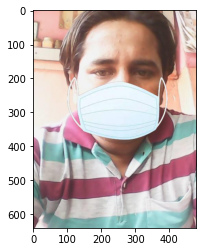

In [ ]:
img = choose_rand_img('/content/dataset/dataset/1')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


tf.random.set_seed(42)

img_size= (224, 224)
batch_size=32
seed=42
data_path = '/content/dataset/dataset/'

data_gen = ImageDataGenerator(rescale=1./255,  validation_split=0.3)

train_data = data_gen.flow_from_directory(directory=data_path,target_size=img_size, batch_size=batch_size, subset='training', seed=42, class_mode='binary'  ) 
test_data = data_gen.flow_from_directory(directory=data_path,target_size=img_size, batch_size=batch_size, subset='validation', seed=42, class_mode='binary' ) 


Found 964 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [ ]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(10, 3, input_shape=(224, 224, 3),activation="relu"),
      tf.keras.layers.Conv2D(10, 3,  activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
      tf.keras.layers.Conv2D(10, 3,  activation='relu'),
      tf.keras.layers.Conv2D(10, 3,  activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, 'sigmoid')
])

model1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='Adam')

model1.fit(train_data,epochs=10,  steps_per_epoch=len(train_data), validation_data=test_data,  validation_steps=len(test_data) )

Epoch 1/10
31/31 [==============================] - 8s 231ms/step - loss: 0.3205 - accuracy: 0.8745 - val_loss: 0.2446 - val_accuracy: 0.9175
Epoch 2/10
31/31 [==============================] - 7s 218ms/step - loss: 0.1352 - accuracy: 0.9564 - val_loss: 0.1097 - val_accuracy: 0.9612
Epoch 3/10
31/31 [==============================] - 7s 216ms/step - loss: 0.0579 - accuracy: 0.9813 - val_loss: 0.1184 - val_accuracy: 0.9660
Epoch 4/10
31/31 [==============================] - 7s 214ms/step - loss: 0.0613 - accuracy: 0.9793 - val_loss: 0.1052 - val_accuracy: 0.9757
Epoch 5/10
31/31 [==============================] - 7s 215ms/step - loss: 0.0277 - accuracy: 0.9938 - val_loss: 0.1139 - val_accuracy: 0.9733
Epoch 6/10
31/31 [==============================] - 7s 215ms/step - loss: 0.0180 - accuracy: 0.9959 - val_loss: 0.0967 - val_accuracy: 0.9782
Epoch 7/10
31/31 [==============================] - 7s 206ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.1487 - val_accuracy: 0.9733
Epoch 

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
from tensorflow.keras.preprocessing import image

def convert_for_model(img_path,model, target_size=img_size):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img) / 255
    x = x.reshape((1,)+ x.shape)

    return model.predict(x)

In [ ]:
# Real image with mask
!wget -O mask-myths.jpg https://www.henryford.com/-/media/henry-ford-blog/images/interior-banner-images/2020/07/mask-myths.jpg?h=785&la=en&w=1920&hash=ADC164567A8E9350E957ACDCFEF2F78C


--2022-02-05 01:59:57--  https://www.henryford.com/-/media/henry-ford-blog/images/interior-banner-images/2020/07/mask-myths.jpg?h=785
Resolving www.henryford.com (www.henryford.com)... 172.67.22.86, 104.22.69.148, 104.22.68.148, ...
Connecting to www.henryford.com (www.henryford.com)|172.67.22.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144648 (141K) [image/jpeg]
Saving to: ‘mask-myths.jpg’

mask-myths.jpg      100%[===================>] 141.26K   859KB/s    in 0.2s    

2022-02-05 01:59:58 (859 KB/s) - ‘mask-myths.jpg’ saved [144648/144648]



In [ ]:
import numpy as np

np.round(convert_for_model('/content/mask-myths.jpg', model1))

array([[1.]], dtype=float32)

In [ ]:
! wget https://static01.nyt.com/images/2020/04/10/video/HowToMakeAMask_Cover_1/HowToMakeAMask_Cover_1-square640.jpg

--2022-02-05 01:59:58--  https://static01.nyt.com/images/2020/04/10/video/HowToMakeAMask_Cover_1/HowToMakeAMask_Cover_1-square640.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66512 (65K) [image/jpeg]
Saving to: ‘HowToMakeAMask_Cover_1-square640.jpg’

HowToMakeAMask_Cove 100%[===================>]  64.95K  --.-KB/s    in 0.005s  

2022-02-05 01:59:58 (13.6 MB/s) - ‘HowToMakeAMask_Cover_1-square640.jpg’ saved [66512/66512]



In [ ]:
np.round(convert_for_model('/content/HowToMakeAMask_Cover_1-square640.jpg', model1))

array([[1.]], dtype=float32)

In [ ]:
!wget -O face_no_msk.jpg https://media.gettyimages.com/photos/confident-young-man-wearing-purple-tshirt-picture-id1092658864?s=612x612
np.round(convert_for_model('./face_no_msk.jpg', model1))

--2022-02-05 01:59:59--  https://media.gettyimages.com/photos/confident-young-man-wearing-purple-tshirt-picture-id1092658864?s=612x612
Resolving media.gettyimages.com (media.gettyimages.com)... 52.222.149.43, 52.222.149.79, 52.222.149.21, ...
Connecting to media.gettyimages.com (media.gettyimages.com)|52.222.149.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22008 (21K) [image/jpeg]
Saving to: ‘face_no_msk.jpg’

face_no_msk.jpg     100%[===================>]  21.49K  --.-KB/s    in 0s      

2022-02-05 01:59:59 (187 MB/s) - ‘face_no_msk.jpg’ saved [22008/22008]



array([[0.]], dtype=float32)

In [ ]:
model1.save('./mask_detection.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('./mask_detection.h5')

In [ ]:
np.round(convert_for_model('./face_no_msk.jpg', loaded_model))

array([[0.]], dtype=float32)

In [ ]:
! pip install tensorflowjs

     |████████████████████████████████| 77 kB 4.2 MB/s 


In [55]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model1,"ml_model/")